## Cálculo numérico de las autoenergías del TLS

In [41]:
from joblib import delayed, Parallel

from tqdm.auto import tqdm
import numpy as np

from qutip import *
import matplotlib.pyplot as plt
import scipy

%matplotlib widget

#### Hamiltoniano del sistema en la base $|L\rangle, |R\rangle$
$H= \begin{pmatrix}
        \epsilon_L(t) & -\tau \\
        -\tau & \epsilon_R
    \end{pmatrix} = \begin{pmatrix}
        \delta(t)/2 & \tau \\
        \tau & -\delta(t)/2
    \end{pmatrix}$

donde $\delta(t)=(\delta_0+A\cos{wt})$

##### Para calcular las autoenergías en un tiempo $t$ podemos prescindir de la dependencia temporal de $H$

In [42]:
#hamiltoniano
def hamiltonian_creator(delta, tau):
    H = np.zeros((2, 2))
    
    H[0, 0:] = [(delta)/2, tau]
    H[1, 1:] = [-(delta)/2]
    
    H += H.T.conj() - np.diag(np.diag(H))
    
    return H

In [43]:
# parámetros
w = 1
tau = 0.5*w

delta = np.linspace(-5*w,5*w, 1000)

In [44]:
# estados de la base
L = qutip.basis(2,0)
R = qutip.basis(2,1)
psi0 = L

In [45]:
autovalores = []
autoestados = []

for i in range(len(delta)):
    H = hamiltonian_creator(delta[i], tau)
    aval, avec = np.linalg.eigh(H)
    autovalores.append(aval)
    autoestados.append(avec)
        
autovalores = np.array(autovalores)

In [46]:
hypermatrix = np.zeros((len(delta), 2, 2))
for i in range(len(delta)):
    hypermatrix[i] = hamiltonian_creator(delta[i], tau)
    
autovalores, autoestados = np.linalg.eigh(hypermatrix)

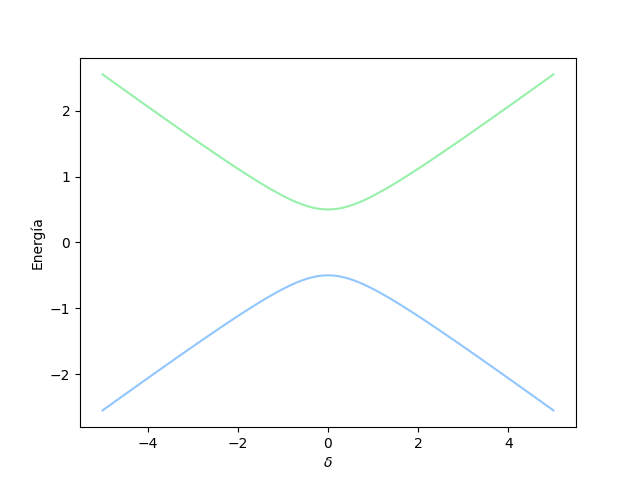

In [47]:
# plt.style.use("seaborn-pastel")
fig, ax = plt.subplots()

ax.plot(delta, autovalores)

ax.set_xlabel(r'$\delta$')
ax.set_ylabel('Energía');